# k-vecinos más cercanos

In [1]:
import os
import path
import zipfile
#import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import plot_confusion_matrix, precision_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
Path = "/home/michell21/Datasets/" #Puede cambiar de acuerdo al usuario

Instalar las siguientes librerías para leer el archivo

- conda install xlrd
- conda install openpyxl

In [3]:
read = pd.read_excel(Path+'Pozos_Michoacan.xlsx')

In [4]:
pozos = pd.DataFrame(pd.read_excel(Path+'Pozos_Michoacan.xlsx'))

In [5]:
pozos.head()

,#,Título,Latitud,Longitud,Estado,Municipio,RegiónHidrológica,Cuenca,AcuíferoHomologado,Volumen (m3/año),Uso
0,1,837156,"19°58'36.0006""","-101°16'41.0007""",MICHOACÁN DE OCAMPO,HUANDACAREO,LERMA-SANTIAGO,188,1602 - MORELIA-QUERENDARO,22800.0,AGRICOLA
1,2,836988,"19°59'22.0004""","-101°16'30.0003""",MICHOACÁN DE OCAMPO,HUANDACAREO,LERMA-SANTIAGO,188,1602 - MORELIA-QUERENDARO,9000.0,AGRICOLA
2,3,836992,"20°02'22.0006""","-101°09'00.0005""",MICHOACÁN DE OCAMPO,CUITZEO,LERMA-SANTIAGO,188,1602 - MORELIA-QUERENDARO,20020.0,AGRICOLA
3,4,836822,"20°01'50.0005""","-101°09'38.0006""",MICHOACÁN DE OCAMPO,CUITZEO,LERMA-SANTIAGO,188,1602 - MORELIA-QUERENDARO,6000.0,AGRICOLA
4,5,835739,"19°49'11.0005""","-101°08'37.0006""",MICHOACÁN DE OCAMPO,TARÍMBARO,LERMA-SANTIAGO,188,1602 - MORELIA-QUERENDARO,30000.0,SERVICIOS


In [6]:
pozos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1363 entries, 0 to 1362
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   #                   1363 non-null   int64  
 1   Título              1363 non-null   object 
 2   Latitud             1363 non-null   object 
 3   Longitud            1363 non-null   object 
 4   Estado              1363 non-null   object 
 5   Municipio           1363 non-null   object 
 6   RegiónHidrológica   1363 non-null   object 
 7   Cuenca              1363 non-null   int64  
 8   AcuíferoHomologado  1363 non-null   object 
 9   Volumen (m3/año)    1363 non-null   float64
 10  Uso                 1363 non-null   object 
dtypes: float64(1), int64(2), object(8)
memory usage: 117.3+ KB


Como no hay registros vacios, se procede a trabajar con los datos. Lo primero será borrar la columna # 

# Visualización de Datos

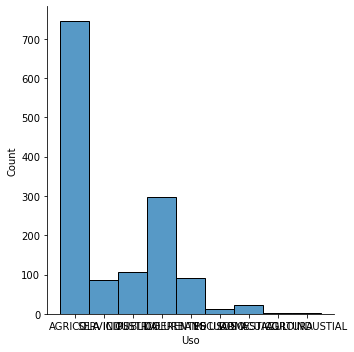

In [73]:
sns.displot(pozos['Uso'], palette="rocket")

# Explorar datos 
Transformar las coordenadas a tipo float Crear columnas de grados

In [6]:
pozos['Estado'].unique() #Eliminar

array(['MICHOACÁN DE OCAMPO'], dtype=object)

In [7]:
pozos['RegiónHidrológica'].unique() 

array(['LERMA-SANTIAGO', 'BALSAS'], dtype=object)

In [5]:
pozos['AcuíferoHomologado'].unique() 

array(['1602  - MORELIA-QUERENDARO', '1602 - MORELIA-QUERENDARO',
       '1610 - CIUDAD HIDALGO-TUXPAN'], dtype=object)

In [7]:
pozos['AcuíferoHomologado'].unique() #Eliminar

array(['1602 - MORELIA-QUERENDARO', '1610 - CIUDAD HIDALGO-TUXPAN'],
      dtype=object)

In [9]:
#Unir los registros con AcuíferoHomologado = '1602 - MORELIA-QUERENDARO' y '1602  - MORELIA-QUERENDARO'
pozos['AcuíferoHomologado'] = pozos['AcuíferoHomologado'].map({'1602  - MORELIA-QUERENDARO': '1602 - MORELIA-QUERENDARO', 
                                                              '1610 - CIUDAD HIDALGO-TUXPAN': '1610 - CIUDAD HIDALGO-TUXPAN',
                                                              '1602 - MORELIA-QUERENDARO': '1602 - MORELIA-QUERENDARO'},na_action=None)#'1602 - MORELIA-QUERENDARO' #1138+197

In [6]:
pozos['Municipio'].unique() #Eliminar

array(['HUANDACAREO', 'CUITZEO', 'TARÍMBARO', 'SANTA ANA MAYA', 'MORELIA',
       'CHARO', 'ACUITZIO', 'COPÁNDARO', 'ÁLVARO OBREGÓN', 'INDAPARAPEO',
       'MORELOS', 'CHUCÁNDIRO', 'QUERÉNDARO', 'ZINAPÉCUARO', 'LAGUNILLAS',
       'ARIO', 'HIDALGO', 'TZINTZUNTZAN', 'HUIRAMBA',
       'JOSÉ SIXTO VERDUZCO', 'LA PIEDAD', 'PURUÁNDIRO'], dtype=object)

In [10]:
pozos.drop(['#', 'Estado', "Título"], axis = 1, inplace = True) #Eliminamos estos dos ya que no aportan información

In [11]:
def grad2float(datos, id1,id2):
    characters = '°\'"'
    lista = []
    for i in datos:
        i = ''.join( x for x in i if x not in characters)
        if i[0] == '-':
            a = -1*(3600*float(i[1:id1]) + 60*float(i[id1:id2]) + float(i[id2:])) #Para latitud
        else:
            a = 3600*float(i[:id1]) + 60*float(i[id1:id2]) + float(i[id2:])
        #a = 3600*float(i[:4]) + 60*float(i[4:6]) + float(i[6:]) #Para longitud
        lista.append(float(a))
    return lista

In [12]:
pozos['Latitud'] = grad2float(pozos['Latitud'], 2, 4)
pozos['Longitud'] = grad2float(pozos['Longitud'], 4, 6)

In [13]:
pozos.head()

,Latitud,Longitud,Municipio,RegiónHidrológica,Cuenca,AcuíferoHomologado,Volumen (m3/año),Uso
0,71916.0006,-364601.0007,HUANDACAREO,LERMA-SANTIAGO,188,1602 - MORELIA-QUERENDARO,22800.0,AGRICOLA
1,71962.0004,-364590.0003,HUANDACAREO,LERMA-SANTIAGO,188,1602 - MORELIA-QUERENDARO,9000.0,AGRICOLA
2,72142.0006,-364140.0005,CUITZEO,LERMA-SANTIAGO,188,1602 - MORELIA-QUERENDARO,20020.0,AGRICOLA
3,72110.0005,-364178.0006,CUITZEO,LERMA-SANTIAGO,188,1602 - MORELIA-QUERENDARO,6000.0,AGRICOLA
4,71351.0005,-364117.0006,TARÍMBARO,LERMA-SANTIAGO,188,1602 - MORELIA-QUERENDARO,30000.0,SERVICIOS


In [45]:
pozos['Uso'].unique()

array(['AGRICOLA', 'SERVICIOS', 'INDUSTRIAL', 'PUBLICO URBANO',
       'DIFERENTES USOS', 'PECUARIO', 'DOMESTICO', 'ACUACULTURA',
       'AGROINDUSTIAL'], dtype=object)

# Dividir los datos en $X$ y $y$

In [14]:
X = pozos.iloc[:,:-1]
y = pozos['Uso']

In [15]:
X.head()

,Latitud,Longitud,Municipio,RegiónHidrológica,Cuenca,AcuíferoHomologado,Volumen (m3/año)
0,71916.0006,-364601.0007,HUANDACAREO,LERMA-SANTIAGO,188,1602 - MORELIA-QUERENDARO,22800.0
1,71962.0004,-364590.0003,HUANDACAREO,LERMA-SANTIAGO,188,1602 - MORELIA-QUERENDARO,9000.0
2,72142.0006,-364140.0005,CUITZEO,LERMA-SANTIAGO,188,1602 - MORELIA-QUERENDARO,20020.0
3,72110.0005,-364178.0006,CUITZEO,LERMA-SANTIAGO,188,1602 - MORELIA-QUERENDARO,6000.0
4,71351.0005,-364117.0006,TARÍMBARO,LERMA-SANTIAGO,188,1602 - MORELIA-QUERENDARO,30000.0


In [16]:
y.head()

0     AGRICOLA
1     AGRICOLA
2     AGRICOLA
3     AGRICOLA
4    SERVICIOS
Name: Uso, dtype: object

## Codificar los datos categoricos y Escalar los datos numericos en X

In [11]:
pozos.describe() #Las demás columnas son columnas categoricas, eso significa que se deben codificar.

,Latitud,Longitud,Cuenca,Volumen (m3/año)
count,1363.000000,1363.000000,1363.000000,1.363000e+03
mean,71490.946855,-364096.132121,28.546588,1.558366e+05
std,645.397221,721.149748,67.485278,3.884465e+05
min,68005.000000,-371361.000000,0.000000,0.000000e+00
25%,71118.004800,-364411.500000,0.000000,1.500000e+04
50%,71468.000000,-364145.000000,0.000000,4.668000e+04
75%,71938.250000,-363778.000000,0.000000,1.621800e+05
max,79260.000000,-362170.000000,188.000000,1.103760e+07


In [16]:
def codificar(data):
    cat = []
    num = []
    for i in data.columns:
        if data[i].dtypes == 'object':
            cat.append(i)
        elif data[i].dtypes == 'float64' or 'int64':
            num.append(i)
    scaler = MinMaxScaler() 
    scaled_values = scaler.fit_transform(data[num])
    data[num] = scaled_values
    code = LabelEncoder()
    data[cat] = data[cat].apply(code.fit_transform)
    print('num', num)
    print('cat',cat)
    return data

In [17]:
x_cod = X.copy()
X_cod = codificar(X)

num ['Latitud', 'Longitud', 'Cuenca', 'Volumen (m3/año)']
cat ['Municipio', 'RegiónHidrológica', 'AcuíferoHomologado']


In [18]:
X_cod.head()

,Latitud,Longitud,Municipio,RegiónHidrológica,Cuenca,AcuíferoHomologado,Volumen (m3/año)
0,0.347490,0.735502,7,1,1.0,0,0.002066
1,0.351577,0.736699,7,1,1.0,0,0.000815
2,0.367570,0.785660,5,1,1.0,0,0.001814
3,0.364727,0.781525,5,1,1.0,0,0.000544
4,0.297290,0.788162,18,1,1.0,0,0.002718


In [19]:
X_cod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1363 entries, 0 to 1362
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Latitud             1363 non-null   float64
 1   Longitud            1363 non-null   float64
 2   Municipio           1363 non-null   int64  
 3   RegiónHidrológica   1363 non-null   int64  
 4   Cuenca              1363 non-null   float64
 5   AcuíferoHomologado  1363 non-null   int64  
 6   Volumen (m3/año)    1363 non-null   float64
dtypes: float64(4), int64(3)
memory usage: 74.7 KB


In [21]:
X_cod['Cuenca'].unique()

array([1.        , 0.96276596, 0.        ])

# Dividir los datos en Train y Test

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X_cod, y, test_size = 0.3, shuffle=True)

# Construir modelo

In [23]:
#n_neighbors = 

knn = KNeighborsClassifier(n_neighbors=5, weights='distance')
knn.fit(X_train, y_train)

KNeighborsClassifier(weights='distance')

Precisión =  0.6430317848410758


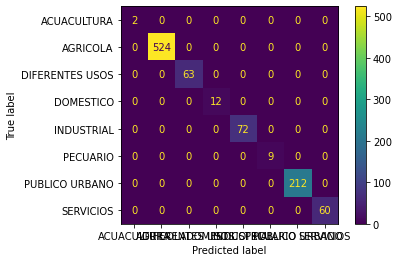

In [25]:
# Predicción

pred = knn.predict(X_test)
y_pred = pd.Series(pred)
print('Precisión = ', precision_score(y_test, pred, average='micro'))
#print(classification_report(y_test, pred))
plot_confusion_matrix(knn, X_train, y_train)

In [45]:
pozos['Uso'].unique()

array(['AGRICOLA', 'SERVICIOS', 'INDUSTRIAL', 'PUBLICO URBANO',
       'DIFERENTES USOS', 'PECUARIO', 'DOMESTICO', 'ACUACULTURA',
       'AGROINDUSTIAL'], dtype=object)

In [26]:
label = y_test.map({'AGRICOLA': 0, 'SERVICIOS': 1, 'INDUSTRIAL': 2, 'PUBLICO URBANO': 3,
                   'DIFERENTES USOS': 4, 'PECUARIO':5, 'DOMESTICO': 6, 'ACUACULTURA': 7, 'AGROINDUSTIAL': 8},na_action=None)

In [27]:
label_p = y_pred.map({'AGRICOLA': 0, 'SERVICIOS': 1, 'INDUSTRIAL': 2, 'PUBLICO URBANO': 3,
                   'DIFERENTES USOS': 4, 'PECUARIO':5, 'DOMESTICO': 6, 'ACUACULTURA': 7, 'AGROINDUSTIAL': 8},na_action=None)

In [28]:
def grafica(data):
    for i in range(9):
        plt.scatter(x=data[data==i].index, y=data[data==i], cmap='Sequential')
    return plt.show()

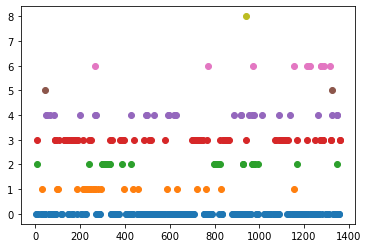

In [29]:
grafica(label)

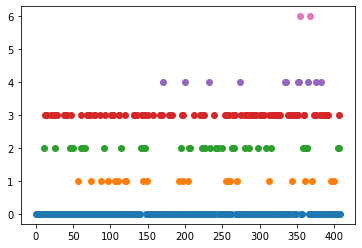

In [30]:
grafica(label_p) #El modelo no identifica más de la mitad de las etiquetas

# Encontrar el valor de k

Text(0, 0.5, 'Precision')

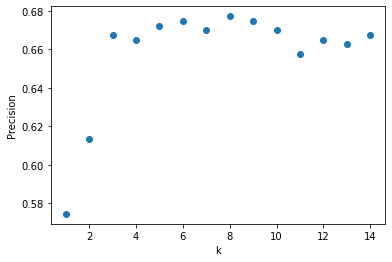

In [37]:
k_range = range(1, 15)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    pred1=knn.predict(X_test)
    scores.append(precision_score(y_test, pred1, average='micro'))
#plt.figure()
plt.scatter(k_range, scores)
plt.xlabel('k')
plt.ylabel('Precision')
#plt.xticks([0,5,10,15,20])

In [32]:
knn_final = KNeighborsClassifier(n_neighbors=8, weights='distance')
knn_final.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=8, weights='distance')

In [33]:
pred_final = knn_final.predict(X_test)
y_pred_final = pd.Series(pred_final)
print('Precisión = ', precision_score(y_test, y_pred_final, average='micro'))

Precisión =  0.6650366748166259


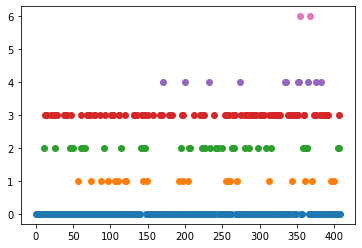

In [34]:
label_final = y_pred.map({'AGRICOLA': 0, 'SERVICIOS': 1, 'INDUSTRIAL': 2, 'PUBLICO URBANO': 3,
                   'DIFERENTES USOS': 4, 'PECUARIO':5, 'DOMESTICO': 6, 'ACUACULTURA': 7, 'AGROINDUSTIAL': 8},na_action=None)
grafica(label_p)

## Revisar una K mejor